In [2]:
import pickle as pkl
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
with open('results_dict.pkl', 'rb') as f:
    sarimax_forecasts_dict = pkl.load(f)
with open('lr_results_dict.pkl', 'rb') as f:
    lr_forecasts_dict = pkl.load(f)

In [20]:
lr_forecasts_dict

{1:                     LR        True
 2022-06-21  170.601559  171.309998
 2022-06-22  171.348035  170.259995
 2022-06-23  170.275329  170.089996
 2022-06-24  170.153199  169.899994
 2022-06-27  169.936254  169.619995
 ...                ...         ...
 2024-07-16  227.465662  227.229996
 2024-07-17  226.372035  225.779999
 2024-07-18  225.047333  221.729996
 2024-07-19  221.012869  221.800003
 2024-07-22  221.185230  222.580002
 
 [567 rows x 2 columns],
 5:                     LR        True
 2022-06-21  170.601559  171.309998
 2022-06-22  170.628509  170.259995
 2022-06-23  170.639221  170.089996
 2022-06-24  170.647270  169.899994
 2022-06-27  170.659356  169.619995
 ...                ...         ...
 2024-07-16  220.515266  227.229996
 2024-07-17  219.516363  225.779999
 2024-07-18  218.820475  221.729996
 2024-07-19  221.012869  221.800003
 2024-07-22  220.510084  222.580002
 
 [567 rows x 2 columns],
 30:                     LR        True
 2022-06-21  170.601559  171.309998


In [21]:
merged_dict = {}
for key in set(sarimax_forecasts_dict) | set(lr_forecasts_dict):
    sarimax_df = sarimax_forecasts_dict.get(key)
    lr_df = lr_forecasts_dict.get(key)

    # Merge the two dataframes on the 'Date' column
    if sarimax_df is not None and lr_df is not None:
        merged_df = pd.concat([sarimax_df, lr_df], axis=1)  # Merge on index (Date)
    elif sarimax_df is not None:
        merged_df = sarimax_df
    elif lr_df is not None:
        merged_df = lr_df
    
    merged_dict[key] = merged_df

merged_dict

{1:                  ARIMA      SARIMA     SARIMAX          LR        True
 2022-06-21         NaN         NaN         NaN  170.601559  171.309998
 2022-06-22         NaN         NaN         NaN  171.348035  170.259995
 2022-06-23         NaN         NaN         NaN  170.275329  170.089996
 2022-06-24         NaN         NaN         NaN  170.153199  169.899994
 2022-06-27         NaN         NaN         NaN  169.936254  169.619995
 ...                ...         ...         ...         ...         ...
 2024-08-23  229.369995  230.378260  230.876151         NaN         NaN
 2024-08-26  232.020004  231.530965  231.602413         NaN         NaN
 2024-08-27  232.759995  231.620216  231.874769         NaN         NaN
 2024-08-28  233.389999  231.878935  231.948415         NaN         NaN
 2024-08-29  231.750000  231.554091  231.645002         NaN         NaN
 
 [596 rows x 5 columns],
 5:                  ARIMA      SARIMA     SARIMAX          LR        True
 2022-06-21         NaN        

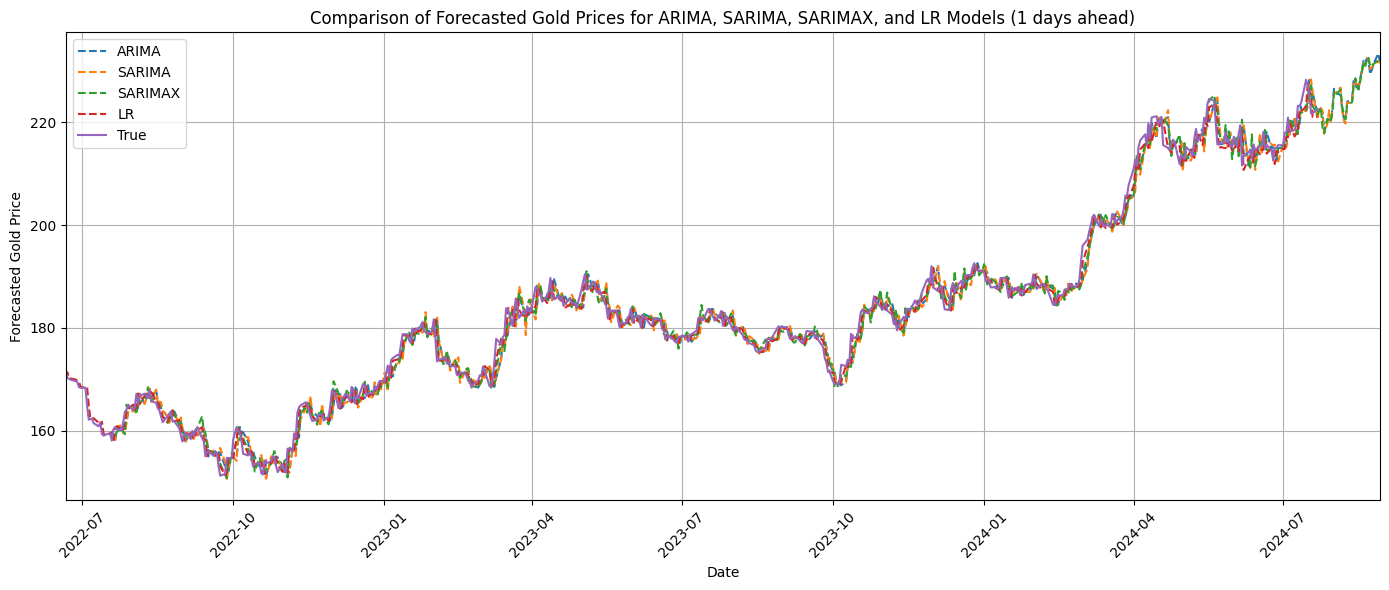

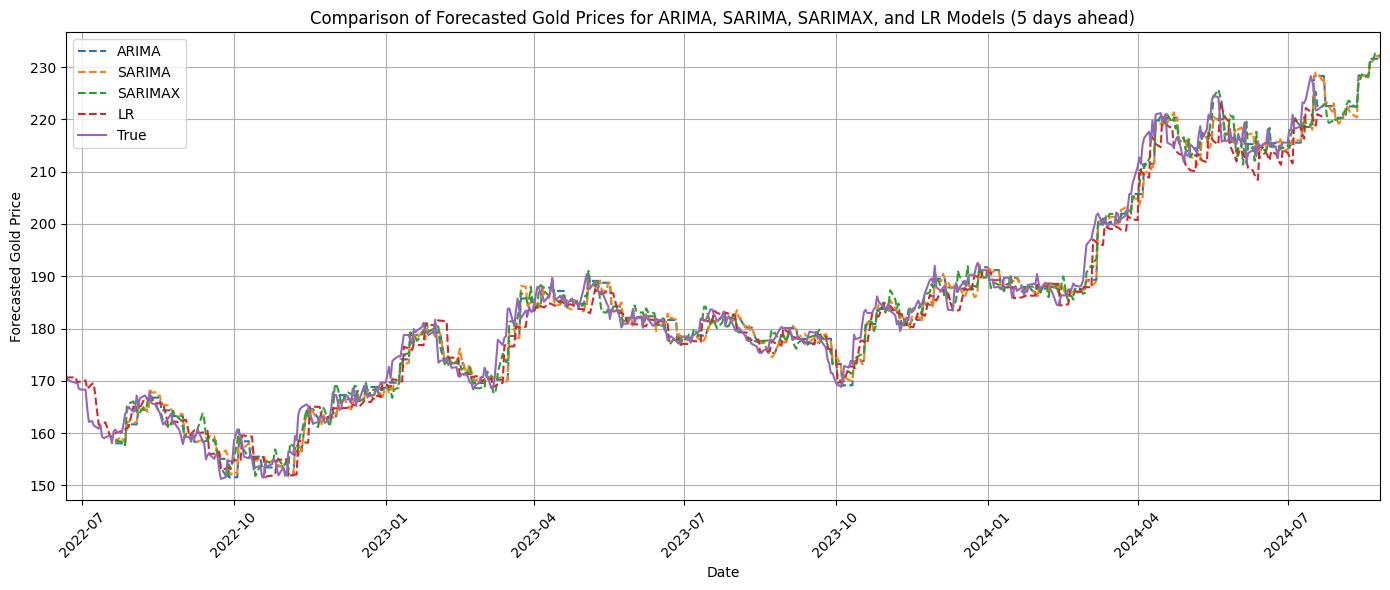

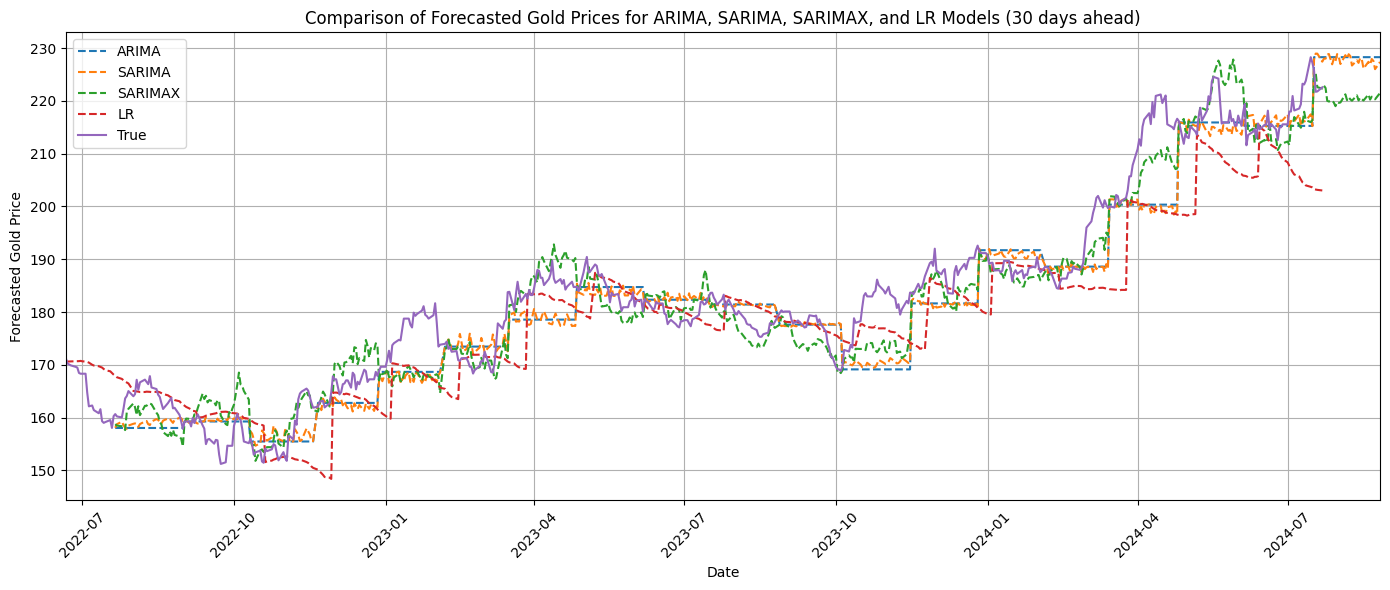

In [29]:
for i in [1,5,30]:
    plt.figure(figsize=(14, 6))
    for col in merged_dict[i].columns:
        if col!='True':
            linestyle = '--'
            alpha = 0.5
        else:
            linestyle = '-'
            alpha = 1
        plt.plot(merged_dict[i].index, merged_dict[i][col], label=col, linestyle=linestyle)
    # Plot each model's predictions
    

    # Add labels and title
    plt.xlabel('Date')
    plt.ylabel('Forecasted Gold Price')
    plt.title(f'Comparison of Forecasted Gold Prices for ARIMA, SARIMA, SARIMAX, and LR Models ({i} days ahead)')
    plt.legend(loc='upper left')

    # Rotate the x-axis labels for readability
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.xlim(merged_dict[i].index.min(), merged_dict[i].index.max())

    # Show the plot
    plt.tight_layout()
    plt.show()
